## 유전 알고리즘
*   TSP(Traveling Salesman Problem)






In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Good Examples: seed(0), nCity: 13
np.random.seed(5)
nCity = 7           # Number of cities
pNum = 20           # Population Size of each Generation

x = np.random.randint(5, 45, nCity)
y = np.random.randint(5, 45, nCity)

##### TSP 확인용 예시
x = [ 8, 10, 15, 20, 25, 30, 35, 40, 42, 40, 35, 30, 25, 20, 15, 10]
y = [25, 34, 40, 43, 45, 43, 40, 34, 25, 16, 10, 7,  5,  7,  10, 15]
nCity = len(x)

def crossover(p1, p2, ncity):   # 교배 함수 -> 두 부모의 중간 절단, 접합
    cut = ncity//2
    child1 = p1[:cut]    
    child2_tmp = p2[:]
    i = 0
    j = cut
    while(i < cut and  j < ncity-1):
        while(i < cut and p2[i] in child1):
            i += 1
        while(j < ncity-1 and p2[j] not in child1):
            j += 1
        if (i < cut and j < ncity-1):
            child2_tmp[j] = p2[i]
            i += 1
            j += 1
    child2 = child2_tmp[cut:]
    return child1+child2

def score_calc(dist, pop, ncity) :  # 개체별 경로 길이 계산 함수
    score = []
    for i in range(pNum):
        fsum = 0
        fsum += dist[0][pop[i][0]]
        for j in range(ncity-2):
            fsum += dist[pop[i][j]][pop[i][j+1]]
        j += 1
        fsum += dist[pop[i][j]][0]
        score.append(fsum.round(1))
    return score

def new_gen(pop, par_candi, ncity) :  # 새로운 세대의 개체 생성 함수
    new_pop = []
    for i in range(pNum):
        parent = np.random.choice(par_candi, 2, replace=False)
        child = crossover(pop[parent[0]], pop[parent[1]], ncity)
        
        if np.random.rand() < 0.2 :     # 돌연변이 발생 --> 임의의 자식 중 임의의 유전자 강제 교환
            mutate = np.random.choice(range(ncity-1), 2, replace=False)
            temp = child[mutate[0]]
            child[mutate[0]] = child[mutate[1]]
            child[mutate[1]] = temp
        new_pop.append(child)
    return new_pop
 

In [11]:
pos = list(zip(x,y))
dist = np.zeros((nCity, nCity))
for i in range(nCity) :     # 모든 두지점 사이의 직선거리 계산
    for j in range(nCity) :
        if i == j :
            continue
        dist[i,j] = np.sqrt(np.square(pos[i][0]-pos[j][0])+np.square(pos[i][1]-pos[j][1])).round(1)
        pass
    pass

In [12]:
pos

[(40, 44), (19, 32), (43, 35), (21, 21), (14, 12), (13, 17), (41, 20)]

In [13]:
dist

array([[ 0. , 24.2,  9.5, 29.8, 41.2, 38.2, 24. ],
       [24.2,  0. , 24.2, 11.2, 20.6, 16.2, 25.1],
       [ 9.5, 24.2,  0. , 26.1, 37. , 35. , 15.1],
       [29.8, 11.2, 26.1,  0. , 11.4,  8.9, 20. ],
       [41.2, 20.6, 37. , 11.4,  0. ,  5.1, 28.2],
       [38.2, 16.2, 35. ,  8.9,  5.1,  0. , 28.2],
       [24. , 25.1, 15.1, 20. , 28.2, 28.2,  0. ]])

In [14]:
# Initial Population and fitness score
pop = [list(np.random.choice(range(1,nCity),nCity-1,replace=False)) for _ in range(pNum)]
pop

[[3, 6, 5, 4, 1, 2],
 [5, 1, 3, 6, 2, 4],
 [1, 4, 2, 5, 3, 6],
 [1, 4, 6, 5, 2, 3],
 [4, 5, 2, 6, 1, 3],
 [2, 4, 3, 5, 6, 1],
 [6, 1, 3, 5, 4, 2],
 [1, 6, 3, 5, 4, 2],
 [3, 4, 2, 1, 5, 6],
 [3, 2, 1, 5, 6, 4],
 [1, 5, 2, 3, 6, 4],
 [6, 5, 4, 3, 1, 2],
 [5, 4, 3, 6, 1, 2],
 [5, 6, 3, 2, 1, 4],
 [3, 2, 4, 5, 6, 1],
 [5, 2, 6, 4, 1, 3],
 [2, 4, 3, 5, 6, 1],
 [3, 1, 5, 2, 4, 6],
 [6, 4, 2, 1, 3, 5],
 [4, 5, 3, 6, 2, 1]]

In [15]:
score = score_calc(dist, pop, nCity)
print(len(score))
print(score)

20
[137.4, 178.9, 169.7, 192.1, 162.5, 144.3, 120.8, 129.8, 170.8, 193.9, 190.9, 113.6, 133.5, 198.5, 175.5, 178.1, 144.3, 181.4, 171.7, 138.7]


120.8 
116.1 101.5 102.2 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 
101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 
101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 
101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 
101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 
101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 
101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101.5 101

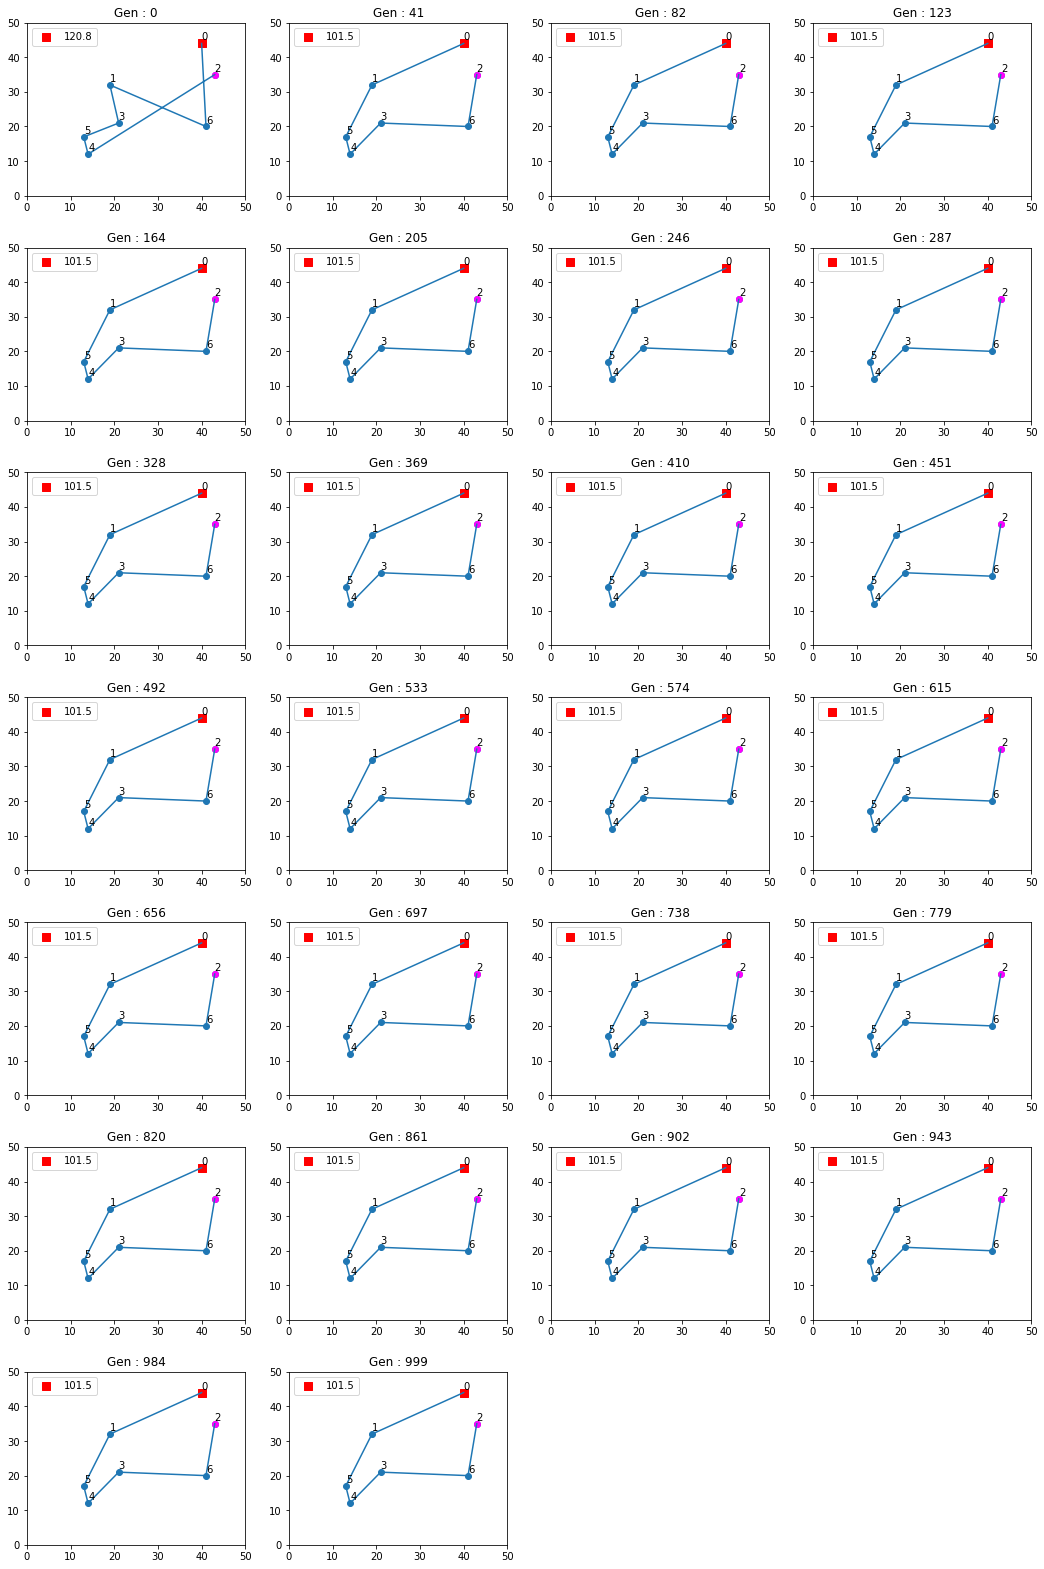

In [16]:
repeat = 1000        # 세대 반복 회수

### 경로 표시 그래프 초기화
step = repeat//24   # 그래프 표시 단계수
if step < 1:
    step = 1
s = 0               # 그래프 표시 단계 인덱스
fig = plt.figure(figsize=(18, 28))

for k in range(repeat):     # 반복회수만큼 세대 반복
    par_candi = np.argsort(score)[0:int(pNum*0.6)]  # 상위 60% 선택하여
    
    pop = new_gen(pop, par_candi, nCity)            # 무작위 교배 후 다음 세대 생성

    score = []
    score = score_calc(dist, pop, nCity)
    first = np.argsort(score)[0]            # 적합도 1위 개체 선택, 출력
    print(score[first], end=' ')
    if (k%25 == 0):
        print()

###### 각 step 세대마다 적합도 1위 개체의 순회 경로 그리기  ######    
    if k != s*step and k != repeat-1 :
        continue
    plt.subplot(7,4,s+1)
    plt.subplots_adjust(hspace=0.3)
    plt.scatter(x[0], y[0], marker='s', c='red', s=55)
    plt.scatter(x[1:], y[1:])
    plt.scatter(x[pop[first][-1]], y[pop[first][-1]], c='magenta')
    for i in range(nCity):
        plt.text(pos[i][0], pos[i][1]+1, i)

    plotX = []
    plotX.append(pos[0][0])
    plotY = []
    plotY.append(pos[0][1])
    for i in range(nCity-1):
        plotX.append(pos[pop[first][i]][0])
        plotY.append(pos[pop[first][i]][1])

    plt.plot(plotX, plotY)

    plt.legend([str(score[first])])
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.title("Gen : {}".format(k))
    s = s+1